# MOVIE RECOMMENDATION SYSTEM
---
**TEAM_MM2_JHB**

# Contents
---
1. Introduction
- Problem Statement 
- Data description 
2. Loading Libraries
3. Data Loading and Description
- Getting familiar with the data
4. Preprocessing
- Missing or null values
- Treament of null values
- Normalising and combining the data
5. Exploratory Data Analysis

6. Modelling
- Feature engeneering 
- Baseline Only Model
- SVD model
- NMF model
- Model performance check (using RMSE) 
- Hyperparameter tuning
- Predictions
- Model saving

# Introduction
Recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis.Recommender systems are among the most popular applications of data science today. They are used to predict the "rating" or "preference" that a user would give to an item.

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user. They are used to predict the rating or preference that a user would give to an item. Amazon uses it to suggest products to customers, Facebook uses it to recommend pages to like and people to follow. Moreover YouTube, Netflix, Spotify use it to decide which video to play next on autoplay.

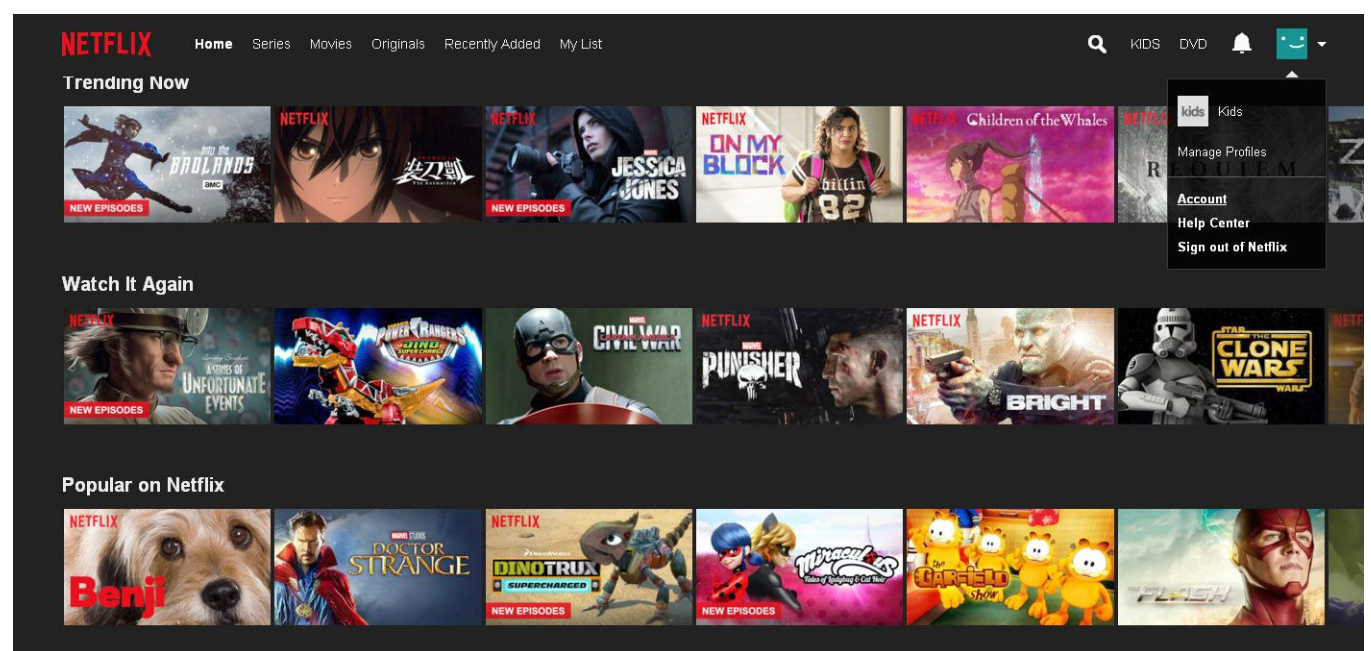

# Predict Objective
We are required to construct a recommendation algorithm (based on content or collaborative filtering) that is capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

# 1.1 Problem Statement
construct a recommendation algorithm based on content or collaborative filtering capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences

# 1.2 Dataset Description
This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data and resampled for fair evaluation purposes.

# Supplied Files
- genome_scores.csv - A score mapping the strength between movies and tag-related properties.
- genome_tags.csv - User assigned tags for genome-related scores.
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

# Additional Information
The below information is provided directly from the MovieLens dataset description files:


# Ratings Data File Structure (train.csv)

All ratings are contained in the file train.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

userId,movieId,rating,timestamp

The lines within this file are ordered first by userId, then, within the user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.


# Tags Data File Structure (tags.csv)

All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

userId,movieId,tag,timestamp

The lines within this file are ordered first by userId, then, within the user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag are determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970


# Movies Data File Structure (movies.csv)

Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,title,genres

Movie titles are entered manually or imported from https://www.themoviedb.org/ and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

Action Adventure Animation Children's Comedy Crime Documentary Drama Fantasy Film-Noir Horror Musical Mystery Romance Sci-Fi Thriller War Western (no genres listed)


# Links Data File Structure (links.csv)

Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,imdbId,tmdbId

movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.


# Tag Genome (genome-scores.csv and genome-tags.csv)

As described in this article, the tag genome encodes how strongly movies exhibit particular properties represented by tags (atmospheric, thought-provoking, realistic, etc.). The tag genome was computed using a machine learning algorithm on user-contributed content including tags, ratings, and textual reviews.

The genome is split into two files. The file genome-scores.csv contains movie-tag relevance data in the following format:

movieId,tagId,relevance

The second file, genome-tags.csv, provides the tag descriptions for the tag IDs in the genome file, in the following format:

tagId,tag

# 2. Libraries

We will being by importing the libraries and packages that we are going to use to process, visualise and create our models. The data that we will use will be imported from a CSV file into dataframes.
### Import libraries and packages 

In [88]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS
import time



# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from sklearn.cluster import KMeans
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD, BaselineOnly, CoClustering, NMF

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

# Import data

In [89]:
sample_submission = pd.read_csv('sample_submission.csv')
movies = pd.read_csv('movies.csv')
imdb = pd.read_csv('imdb_data.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
tags = pd.read_csv('tags.csv')
links = pd.read_csv('links.csv')

# 3. Getting familiar with the Data

Following the necessary imports is for viewing the data and describing or summarizing what insight we hope to get from that data.

In [90]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [7]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [9]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [10]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


the 'timestamp' column on the dataframe above has a int64 column type. This was checked because I wanted to do EDA on the time but the format is unclear. Will speak to Maddy about it.

In [11]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [12]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [13]:
dataset=pd.merge(train,movies,on='movieId')

In [14]:
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [15]:
import datetime
from datetime import datetime,date
dataset['datetime']=pd.to_datetime(dataset['timestamp'])

In [44]:
dataset1=pd.merge(imdb,movies,on='movieId')

In [45]:
dataset1.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,release_year,rating
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]",Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",1995,4.0
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]",Jumanji (1995),"[Adventure, Children, Fantasy]",1995,4.5
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]",Grumpier Old Men (1995),"[Comedy, Romance]",1995,5.0
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be...",Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1995,2.0
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]",Father of the Bride Part II (1995),[Comedy],1995,3.0


# 4. Data preprocessing

Firstly, we check if our data has any null values, missing values and blank spaces.

In [18]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [19]:
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [20]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [21]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [22]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [23]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [24]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [25]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [40]:
blanks = []  

for ms in movies.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [41]:
blanks = []  

for ms in imdb.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [42]:
blanks = []  

for ms in genome_scores.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [43]:
blanks = []  

for ms in tags.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


In [30]:
blanks = []  

for ms in links.itertuples():  
    if type(ms)==str:            
        if ms.isspace():         
            blanks.append(i)     
        
print(len(blanks), 'blanks: ', blanks)

0 blanks:  []


All the dataframes have been checked at we have a few null values in some data frames which are as follows.
On the imdb dataframe:
- title_cast       10068
- director          9874
- runtime          12089
- budget           19372
- plot_keywords    11078

On the tags dataframe:
- tag          16

On the links dataframe:
- tmdbId     107

There are no blank entries on any dataframe. 

# 4.1 Treatment of null values will be added here

Though you can get a quick estimate of the missing values, you are artificially reducing the variation in the dataset as the missing observations could have the same value. This may impact the statistical analysis of the dataset since depending on the percentage of missing observations imputed, metrics such as mean, median, correlation, etc may get affected.

# 5. Exploratory Data Analysis(EDA)

Now let us begin the process of exploring our data. This process will be referred to as Exploratory Data Analysis or EDA. The reason we explore the data is to gain insight on the data and how it behaves. Exploratory data analysis (EDA) is a term for certain kinds of initial analysis and findings done with data sets, usually early on in an analytical process. Some experts describe it as “taking a peek” at the data to understand more about what it represents and how to apply it.

In [92]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


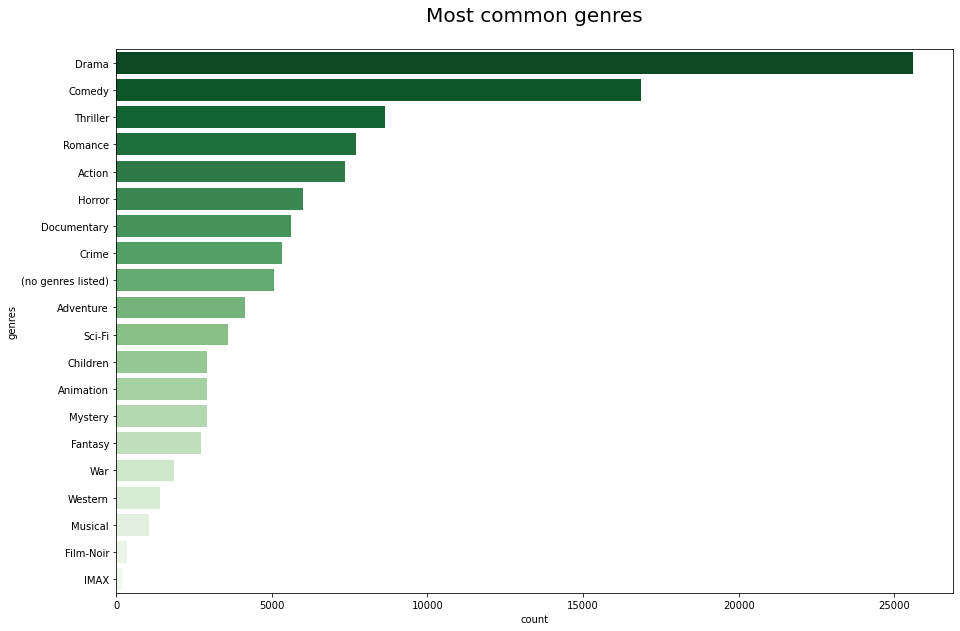

In [93]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Greens_r')
plt.show()

The graph above shows that the most common genres are drama, comedy, thriller, etc. People love drama movies more than any other genre therefore more of those should always form part of a user's recommendation. Children and animation genres are equally common and this could be attributed to the fact that most children's movies are animated.

In [33]:
train1 = train.copy()
train1.drop('timestamp', axis = 1, inplace = True)

In [34]:
ratings_per_user = train1.groupby('userId')['rating'].count().reset_index().sort_values('rating', ascending=False)

In [35]:
ratings_per_user.head(10)

,userId,rating
72314,72315,12952
80973,80974,3680
137292,137293,3588
33843,33844,3208
20054,20055,3050
109730,109731,2671
49402,49403,2670
92045,92046,2579
110970,110971,2288
30878,30879,2284


#### Ratings per user

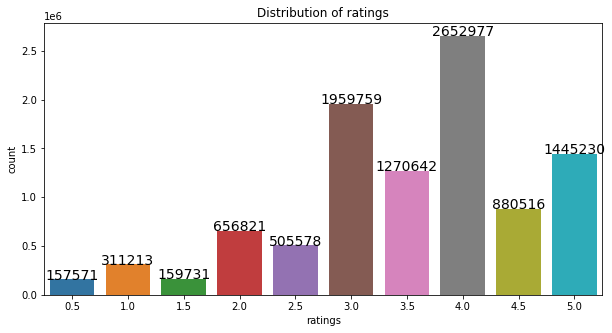

In [60]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=train, x='rating')
labels = (train['rating'].value_counts().sort_index())
plt.title('Distribution of ratings')
plt.xlabel('ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

The train distribution shows that there are relatively fewer movies that are lower rated. This can be because most of the users who didn't like the movie, didn't care enough to rate the movie. You should note this, it can be useful later. As you wouldn't want to recommend movies with relatively low number of ratings as users probably didn't like them.

#### Movie runtime statistics

In [49]:
popular_runtime= pd.DataFrame(imdb['runtime'].value_counts()) 
popular_runtime.head()

,runtime
90.0,724
95.0,497
100.0,473
93.0,467
96.0,422


In [50]:
imdb_stats = pd.DataFrame(imdb['runtime'].describe())
imdb_stats

,runtime
count,15189.000000
mean,100.312331
std,31.061707
min,1.000000
25%,89.000000
50%,98.000000
75%,109.000000
max,877.000000


The most common runtime of movies is 90.0 minutes (1HR 30 Minutes). Looking at the summary statistics, we see that a majority of the movies usually deviate from others by 30 minutes with about 50% of the movies running for 90+ minutes. There is a movie that has a runtime of 877 minutes which is equivalent to 14 hours. From the stats, it is clear that that runtime is not very common which means that the movie is an outlier and will not be taken into consideration when recommendations are made.

#### Most appearing director

In [51]:
imdb['director'].count()

17404

In [52]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)

In [53]:
def feature_count(df, column):
    plt.figure(figsize=(14,7))
    ax = sns.barplot(x = df[f'{column}'], y= df['count'], palette='Greens_r')
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

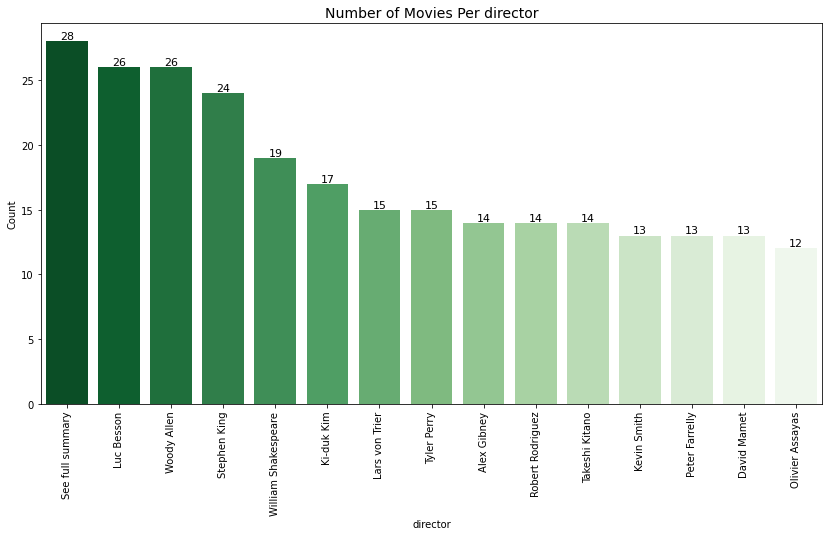

In [54]:
directors = count_directors(imdb)
feature_count(directors.head(15), 'director')

From above we can see that some directors have directed movies a lot more than others. We have Luc Besson with the most directs at 26 movies and some directors at only 12 movies. The number of times directors have worked on a movie helps better understand their directing style and how they are likely to be rated. With this information, we should be able to make better recommendations based on the popularity of the director and their track record.

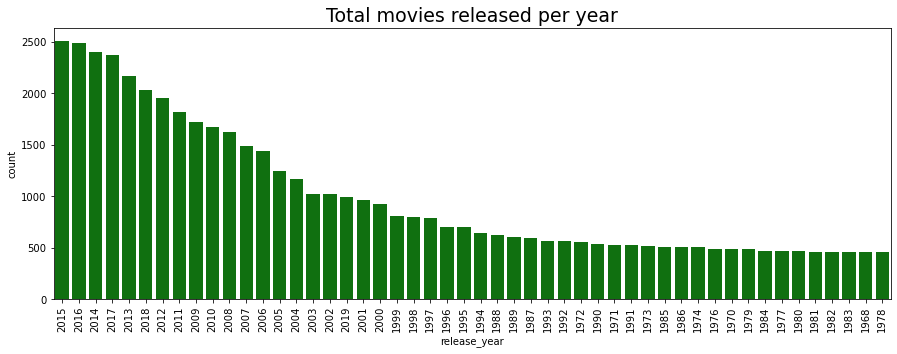

In [55]:
#Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(15, 5))
axes=sns.countplot(x=movies['release_year'], order = movies['release_year'].value_counts()[0:50].index,color='green')
axes.set_title('Total movies released per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

Above, we observe that the years 2015 and 2016 are the years where the highest number of movies were released.What the diagram above communicates to us is that as the years progress, the amount of movies being released have significantly increased.The number of movies being released per year have definitely went up since the year 2000.

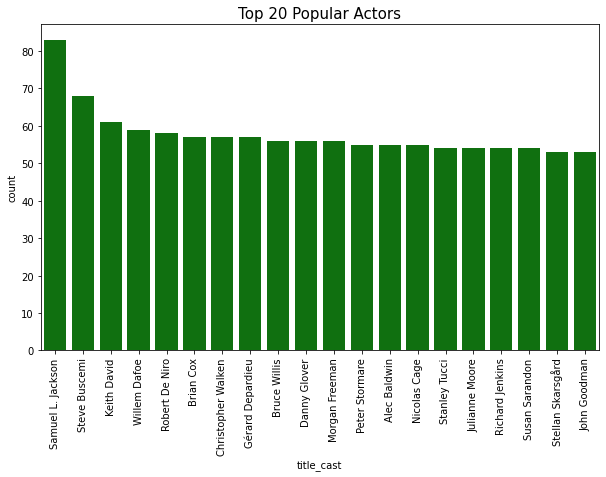

In [69]:
#Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=imdb['title_cast'].explode()
ax=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='green')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Avarage rating

In [22]:
dataset=dataset.groupby('title')['rating'].mean()
dataset

title
"BLOW THE NIGHT!" Let's Spend the Night Together (1983)    3.000000
"Great Performances" Cats (1998)                           2.753731
#1 Cheerleader Camp (2010)                                 1.900000
#Female Pleasure (2018)                                    4.000000
#FollowMe (2019)                                           2.400000
                                                             ...   
به نام پدر                                                 3.250000
…And the Fifth Horseman Is Fear (1965)                     3.000000
チェブラーシカ (2010)                                             2.000000
貞子3D (2012)                                                2.562500
줄탁동시 (2012)                                                3.000000
Name: rating, Length: 48151, dtype: float64

In [23]:
sorted_train_wise_movies=dataset.sort_values(ascending=False)
sorted_train_wise_movies

title
Which Way Home (2009)                 5.0
Kaakha Kaakha (2003)                  5.0
Not Quite Human II (1989)             5.0
Selling Isobel (2018)                 5.0
Sehar (2005)                          5.0
                                     ... 
Down and Out with the Dolls (2001)    0.5
The Informer (2019)                   0.5
Dough and Dynamite (1914)             0.5
Ideal Husband, An (1947)              0.5
Dopo quella notte (2010)              0.5
Name: rating, Length: 48151, dtype: float64

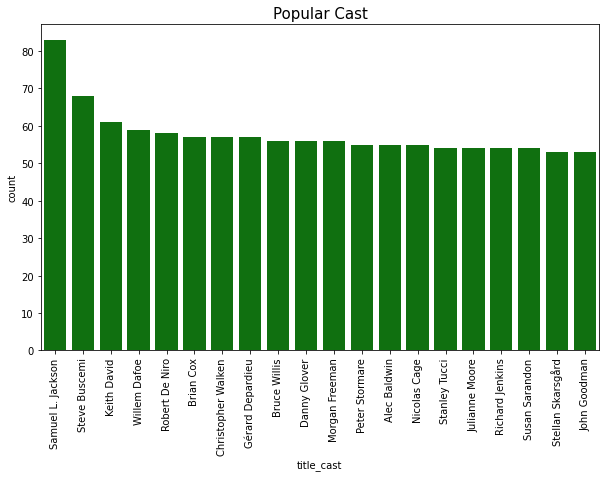

In [62]:
#Plotting popular cast using count-plot
plt.figure(figsize = (10,6))
title_cast=imdb['title_cast'].explode()
axes=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='green')
axes.set_title('Popular Cast',fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Popular words used in movie titles

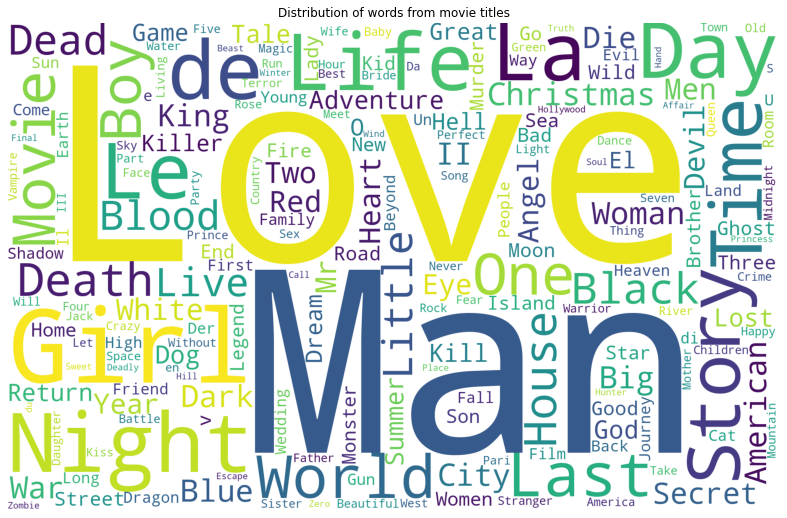

In [65]:
# Wordcloud of movie titles
movies_word = movies['title'] = movies['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'White',
                            height = 1200,
                            width = 1900).generate(movies_wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of words from movie titles')
plt.tight_layout(pad=0)
plt.show()

The visual above shows which words are commonly used when movies are titled. The bigger the word, the more it is being used. As can be seen, the word "love", "Man", and "Girl" appears the most.

# Feature Engineering

In [24]:
# Load reader and data in surprise friendly format
reader = Reader(rating_scale=(0.5, 5))
train2 = Dataset.load_from_df(train1[['userId', 'movieId', 'rating']], reader)

# Modelling

# Baseline only model


BaselineOnly algorithm predicts the baseline estimate for given user and item.A baseline is a method that uses simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline’s performance (e.g., accuracy)– this metric will then become what you compare any other machine learning algorithm against.

In [25]:
# Baseline Only model

algo_b = BaselineOnly()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_b.fit(trainset)
predictions_b = algo_b.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions_b, verbose=True)

Estimating biases using als...
RMSE: 0.8657


0.8656763553648548

# SVD model

SVD algorithm is equivalent to Probabilistic Matrix Factorization.
This is a technique that comes from the field of linear algebra and can be used as a data preparation technique to create a projection of a sparse dataset prior to fitting a model.

In [26]:
# SVD model

algo_svd = SVD()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_svd.fit(trainset)
predictions_svd = algo_svd.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions_svd, verbose=True)

RMSE: 0.8257


0.825655614180046

# NFM Model
Non-negative Matrix Factorization is a Linear-algeabreic model, that factors high-dimensional vectors into a low-dimensionality representation. Similar to Principal component analysis (PCA), NMF takes advantage of the fact that the vectors are non-negative.

In [27]:
algo_nmf = NMF()

trainset, testset = train_test_split(train2, test_size = 0.1)

# train and test algorithm.
algo_nmf.fit(trainset)
predictions_nmf = algo_nmf.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions_nmf, verbose=True)


RMSE: 0.8810


0.8810423998414555

# Hyperparameter tunning of best model

In [30]:
rating_scale = Reader(rating_scale=(0.5, 5))
train = Dataset.load_from_df(train.drop('timestamp', axis=1), rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(n_factors=160, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=20,
                     init_std_dev=0.01)
svd_algo_hyper.fit(train_set)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(val_set)

# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
accuracy.rmse(svd_hyper_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}

RMSE: 0.7889
RMSE: 0.7889


Hyperparameter tuning makes the process of determining the best hyperparameter settings easier and less tedious. The model that has been tuned is the SVD model and the performance increased. The previous RMSE was: and after tuning the new RMSE was:

#### Making predictions

In [31]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,
                                         row.movieId) for idx,row in test.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

#### Displaying predictions

In [32]:
#renaming the fields of the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

,userId,movieId,rating
0,1,2011,3.002552
1,1,4144,4.170337
2,1,5767,3.799900
3,1,6711,4.183175
4,1,7318,2.917190


In [33]:
# Concatenating each userId and movieId to a single Id column for submission
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [34]:
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]
svd_hyper_predictions.head()

,Id,rating
0,1_2011,3.002552
1,1_4144,4.170337
2,1_5767,3.799900
3,1_6711,4.183175
4,1_7318,2.917190


# Saving model

In [35]:
svd_hyper_predictions[['Id','rating']].to_csv('MM2_submission.csv', index=False)

In [36]:
svd_hyper_predictions

,Id,rating
0,1_2011,3.002552
1,1_4144,4.170337
2,1_5767,3.799900
3,1_6711,4.183175
4,1_7318,2.917190
...,...,...
5000014,162541_4079,3.443772
5000015,162541_4467,4.033732
5000016,162541_4980,2.651881
5000017,162541_5689,2.868349


# Saving pickle models

In [38]:
model_save_path = "svd.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(svd_algo_hyper, file)

In [39]:
model_save_path = "nmf.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo_nmf, file)

In [40]:
model_save_path = "b.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo_b, file)